## End to end Deep Learning Project Using Simple RNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [2]:
## Load the imdb dataset

max_features=10000 ##vocabulary size
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_train.shape}, Testing labels shape: {y_test.shape}')

17464789/17464789 [==============================] - 14s 1us/step
Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [3]:
X_train[0],y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
## Inspect a sample review and its label
sample_review=X_train[0]
sample_label=y_train[0]

print(f"Sample review (as integers):{sample_review}")
print(f'Sample label: {sample_label}')


Sample review (as integers):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


In [5]:
### MApping of words index bacl to words(for understanding)
word_index=imdb.get_word_index()
#word_index
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

1641221/1641221 [==============================] - 1s 1us/step


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
from tensorflow.keras.preprocessing import sequence

max_len=500

X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [8]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
## Train Simple RNN
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len)) ## Embedding Layers
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
## Create an instance of EarlyStoppping Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [13]:
## Train the model with early sstopping
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,
    validation_split=0.2,
    callbacks=[earlystopping]
)

Epoch 1/10


625/625 [==============================] - 74s 114ms/step - loss: 9874949120.0000 - accuracy: 0.6219 - val_loss: 0.6048 - val_accuracy: 0.6700
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 3185.1499 - accuracy: 0.7444 - val_loss: 0.5847 - val_accuracy: 0.6842
Epoch 3/10
625/625 [==============================] - 59s 95ms/step - loss: 2.4865 - accuracy: 0.7740 - val_loss: 0.5701 - val_accuracy: 0.6946
Epoch 4/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4354 - accuracy: 0.8191 - val_loss: 0.4984 - val_accuracy: 0.7560
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.3358 - accuracy: 0.8597 - val_loss: 0.4943 - val_accuracy: 0.7622
Epoch 6/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2725 - accuracy: 0.8870 - val_loss: 0.5114 - val_accuracy: 0.7906
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2476 - accuracy: 0.9001 - val_loss: 0.4944

In [14]:
## Save model file
model.save('simple_rnn_imdb.h5')

c:\Users\Dell\Documents\SimpleRNN\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [16]:
# 1. Load and preprocess the IMDB dataset
max_features = 10000  # Number of most frequent words to consider
max_len = 200  # Maximum sequence length

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print('Pad sequences...')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

Loading data...
Pad sequences...


In [17]:
# 2. Build the Simple RNN model
model = Sequential([
    # Embedding layer to convert words to vectors
    Embedding(max_features, 32, input_length=max_len),
    # Simple RNN layer with 32 units
    SimpleRNN(32, return_sequences=False),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])


In [18]:
# 3. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# 4. Train the model
history = model.fit(x_train, y_train,
                   batch_size=64,
                   epochs=10,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/10
313/313 [==============================] - 14s 37ms/step - loss: 0.5066 - accuracy: 0.7408 - val_loss: 0.3890 - val_accuracy: 0.8346
Epoch 2/10
313/313 [==============================] - 9s 30ms/step - loss: 0.3020 - accuracy: 0.8777 - val_loss: 0.3686 - val_accuracy: 0.8404
Epoch 3/10
313/313 [==============================] - 9s 29ms/step - loss: 0.2079 - accuracy: 0.9215 - val_loss: 0.3791 - val_accuracy: 0.8562
Epoch 4/10
313/313 [==============================] - 9s 29ms/step - loss: 0.1526 - accuracy: 0.9452 - val_loss: 0.4044 - val_accuracy: 0.8464
Epoch 5/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0913 - accuracy: 0.9693 - val_loss: 0.4987 - val_accuracy: 0.8466
Epoch 6/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.5427 - val_accuracy: 0.8418
Epoch 7/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.6033 - val_accuracy: 0.820

In [20]:
# 5. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


Test accuracy: 0.8194
Test loss: 0.7450


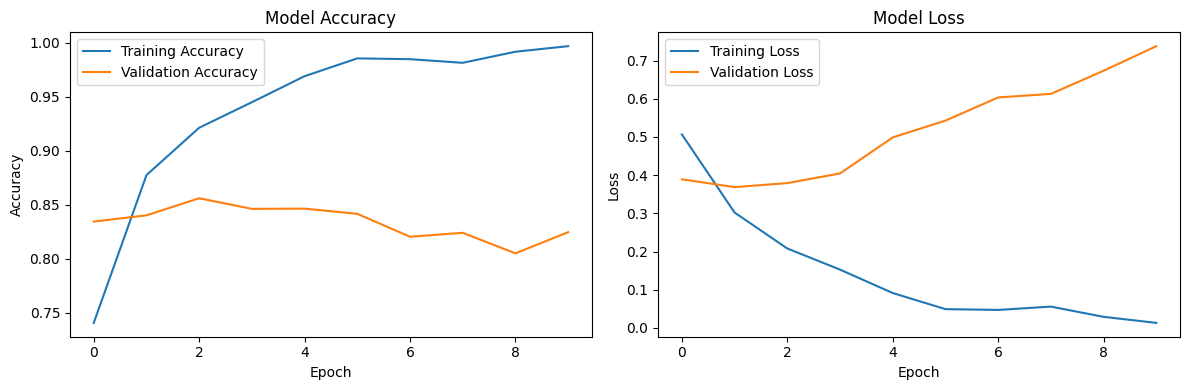

In [21]:
# 6. Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)


In [25]:
# 7. Function to predict sentiment for a single review
def predict_sentiment(text, model, word_index, max_len):
    # Convert text to sequence
    words = text.lower().split()
    seq = [word_index.get(word, 0) for word in words if word in word_index]
    seq = seq[:max_len]  # Truncate if too long
    seq = sequence.pad_sequences([seq], maxlen=max_len)
    
    # Predict
    prediction = model.predict(seq)[0][0]
    return 'Positive' if prediction >= 0.5 else 'Negative', prediction


In [26]:
# Example usage
word_index = imdb.get_word_index()
sample_review = "This movie was amazing and really entertaining"
sentiment, score = predict_sentiment(sample_review, model, word_index, max_len)
print(f'\nSample review: "{sample_review}"')
print(f'Predicted sentiment: {sentiment} (confidence: {score:.4f})')

1/1 [==============================] - 0s 287ms/step

Sample review: "This movie was amazing and really entertaining"
Predicted sentiment: Positive (confidence: 0.9980)


In [45]:
# Example usage
word_index = imdb.get_word_index()
sample_review = "This movie was fantastic! The acting was great and plot was thrilling."
sentiment, score = predict_sentiment(sample_review, model, word_index, max_len)
print(f'\nSample review: "{sample_review}"')
print(f'Predicted sentiment: {sentiment} (confidence: {score:.4f})')

1/1 [==============================] - 0s 44ms/step

Sample review: "This movie was fantastic! The acting was great and plot was thrilling."
Predicted sentiment: Positive (confidence: 0.6048)


In [38]:
word_index.get('thrilling', 0)

3014

In [46]:
## Save model file
model.save('simple_rnn_imdb_data.h5')

c:\Users\Dell\Documents\SimpleRNN\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
